In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('/home/neil/Downloads/Exercise 1.xlsx', sheet_name="Data")

In [2]:
set(df['Region'].values)

{'East Asia & Pacific',
 'Europe and Central Asia',
 'Latin America and Caribbean',
 'Middle East and North Africa',
 'North America',
 'South Asia',
 'Sub-Saharan Africa'}

In [3]:
EAP = list(set(df[df['Region']=='East Asia & Pacific'][df[df['Region']=='East Asia & Pacific']['Country'].isin(['Thailand','Philippines','Myanmar','Malaysia','Laos','Indonesia', 'China', 'Japan', 'Mongolia', 'North Korea', 'South Korea', 'Taiwan', 'Cambodia'])].Country.values))
ECA = list(set(df[df['Region']=='Europe and Central Asia'][df[df['Region']=='Europe and Central Asia']['Country'].isin(['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan','Uzbekistan'])].Country.values))
MENASA = list(set(df[df['Region'].isin(['Middle East and North Africa', 'South Asia'])].Country.values))

In [4]:
MENASA_updated = []
for i in MENASA:
    if i not in ['Rest of South Asia', 'Rest of Middle East and North Africa']:
        MENASA_updated.append(i)

In [5]:
ECA.extend(EAP)

In [6]:
ECA.extend(MENASA_updated)

In [7]:
data = df[df['Country'].isin(list(set(ECA)))]

In [8]:
len(list(set(ECA)))

34

In [9]:
data.count()

Year                    102
Region                  102
Country                 102
Internet_Penetration    102
Gender                  102
                       ... 
d7_loan                 102
d7_money                102
d7_none                 102
d7_stuck                102
d7_work                 102
Length: 92, dtype: int64

In [10]:
pop = pd.read_csv('/home/neil/Downloads/archive/population_by_country_2020.csv')[['Country (or dependency)', 'Population (2020)']]
reqd_pop = pop[pop['Country (or dependency)'].isin(list(set(ECA)))].rename(columns={'Country (or dependency)': 'Country', 
                                                                                   'Population (2020)': 'Population'})


In [11]:
data_new = pd.merge(
    data,
    reqd_pop,
    how="inner",
    on='Country')

In [12]:
pen_arry = []
for i in data_new['Internet_Penetration'].str.extract('(\d+)').values:
    pen_arry.append(int(i)/100)


In [13]:
data_new['w'] = pen_arry * data_new['Population']

In [14]:
combined_data = data_new[data_new['Gender'] == 'Combined']
Male_data =  data_new[data_new['Gender'] == 'Male']
Female_data =  data_new[data_new['Gender'] == 'Female']

In [15]:
sum(combined_data['a1_agree']* combined_data['w'])/ sum(combined_data['w'])

85.72825523695127

In [16]:
sum(Male_data['a1_agree']* Male_data['w'])/ sum(Male_data['w'])

82.48632830741317

In [17]:
sum(Female_data['a1_agree']* Female_data['w'])/ sum(Female_data['w'])

88.75316964778825

In [18]:
sum(combined_data['a2_opps_other']* combined_data['w'])/ sum(combined_data['w'])

5.929027490779039

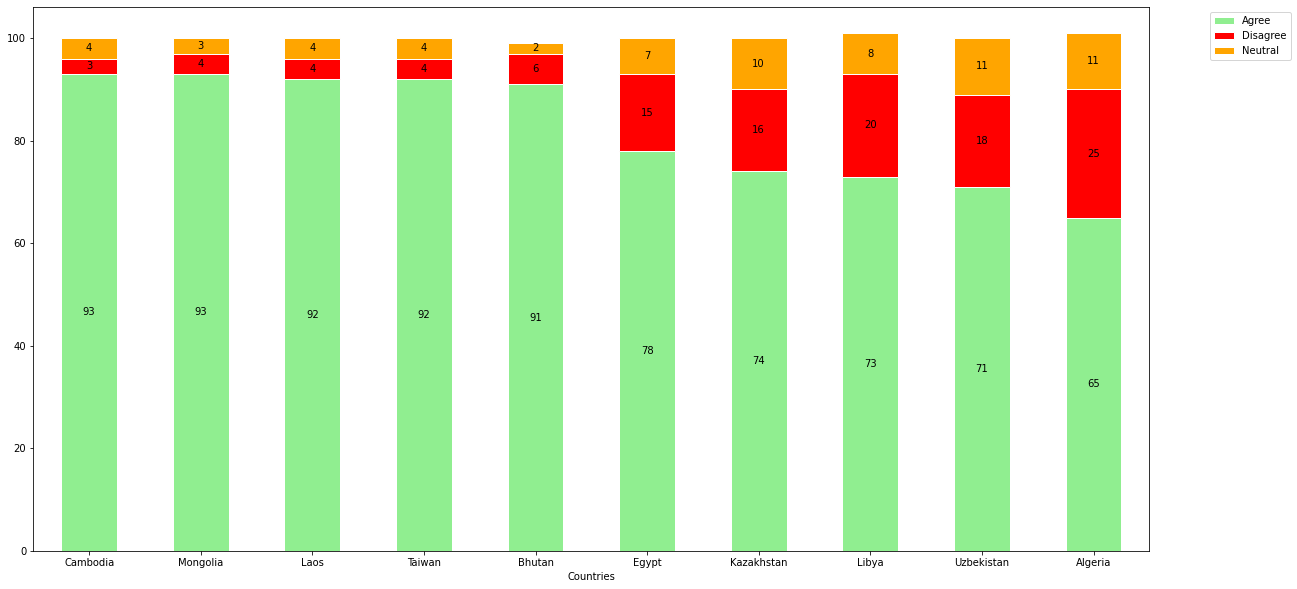

In [19]:
# 1. Agrrement on “Men and women should have equal opportunities (e.g. in education, jobs, household decision-making) 
q1_data = pd.concat([combined_data.sort_values(by='a1_agree', ascending=False).head(5), 
           combined_data.sort_values(by='a1_agree', ascending=False).tail(5)])
val = []
for a in q1_data[['a1_agree', 'a1_neutral', 'a1_disagree']].values:
    for i in a:
        val.append(i)

df1= pd.DataFrame({'Range':['Agree','Neutral', 'Disagree']*10,
        'Value':val})

df_value = df1.assign(idx=df1.groupby('Range').cumcount()).pivot(index='idx', columns='Range', values='Value')
# set colors
colors = ['lightgreen', 'red', 'orange']
# plot the price
ax = df_value.plot.bar(stacked=True, figsize=(20, 10), color=colors, ec='w')
# label the x-axis
plt.xticks(ticks=range(10), labels=q1_data.Country.values, rotation=0)
# x-axis title
plt.xlabel('Countries')
# position the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
col_idx = 0
row_idx = 0
# iterate through each bar patch from ax
for i, p in enumerate(ax.patches, 1):
    left, bottom, width, height = p.get_bbox().bounds
    v = df_value.iloc[row_idx, col_idx]
    if width > 0:
        ax.annotate(f'{v:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center')
    row_idx += 1
    if i%10 == 0:  
        col_idx += 1
        row_idx = 0
plt.savefig('/home/neil/LEAD_images/q1.png')

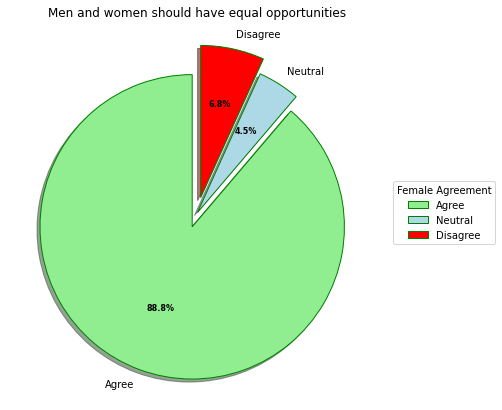

In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
  
  
# Creating dataset 
ag = ['Agree', 'Neutral', 'Disagree']
  
d = [sum(Female_data['a1_agree']* Female_data['w'])/ sum(Female_data['w']),
     sum(Female_data['a1_neutral']* Female_data['w'])/ sum(Female_data['w']),
     sum(Female_data['a1_disagree']* Female_data['w'])/ sum(Female_data['w'])] 
  
  
# Creating explode data 
explode = (0.1, 0.0, 0.1) 
  
# Creating color parameters 
colors = ("lightgreen", "lightblue", "red")
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(d,  
                                  autopct = lambda pct: func(pct, d), 
                                  explode = explode,  
                                  labels = ag, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, ag, 
          title ="Female Agreement", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Men and women should have equal opportunities") 
  
# show plot 
plt.show() 

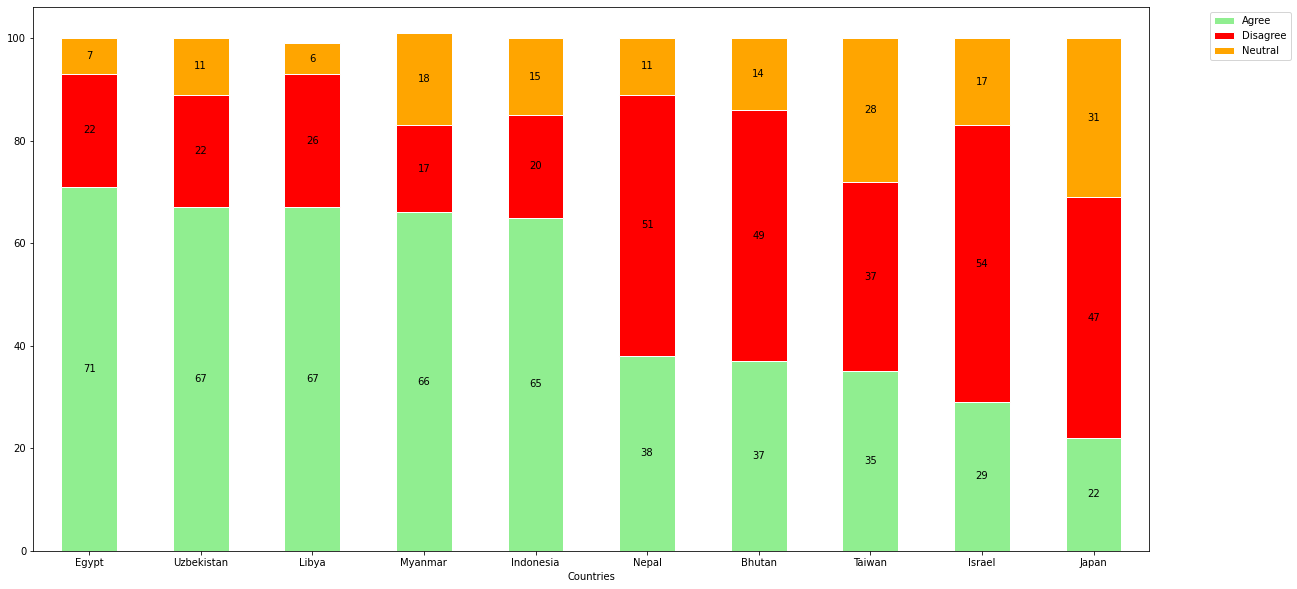

In [21]:
# 1.The household expenses are the responsibility of the man, even if his wife can help him 
q2_data = pd.concat([combined_data.sort_values(by='b4_agree', ascending=False).head(5), 
           combined_data.sort_values(by='b4_agree', ascending=False).tail(5)])
val1 = []
for a in q2_data[['b4_agree', 'b4_neutral', 'b4_disagree']].values:
    for i in a:
        val1.append(i)

df1= pd.DataFrame({'Range':['Agree','Neutral', 'Disagree']*10,
        'Value':val1})

df_value = df1.assign(idx=df1.groupby('Range').cumcount()).pivot(index='idx', columns='Range', values='Value')
# set colors
colors = ['lightgreen', 'red', 'orange']
# plot the price
ax = df_value.plot.bar(stacked=True, figsize=(20, 10), color=colors, ec='w')
# label the x-axis
plt.xticks(ticks=range(10), labels=q2_data.Country.values, rotation=0)
# x-axis title
plt.xlabel('Countries')
# position the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
col_idx = 0
row_idx = 0
# iterate through each bar patch from ax
for i, p in enumerate(ax.patches, 1):
    left, bottom, width, height = p.get_bbox().bounds
    v = df_value.iloc[row_idx, col_idx]
    if width > 0:
        ax.annotate(f'{v:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center')
    row_idx += 1
    if i%10 == 0:  
        col_idx += 1
        row_idx = 0
plt.savefig('/home/neil/LEAD_images/q2.png')

In [22]:
sum(combined_data['b4_agree']* combined_data['w'])/ sum(combined_data['w'])

46.108239183625145

In [23]:
sum(Male_data['b4_agree']* Male_data['w'])/ sum(Male_data['w'])

53.46381856792684

In [24]:
sum(Female_data['b4_agree']* Female_data['w'])/ sum(Female_data['w'])

38.69739219098226

In [25]:
sum(combined_data['b5_man_other']* combined_data['w'])/ sum(combined_data['w'])

6.263672293071627

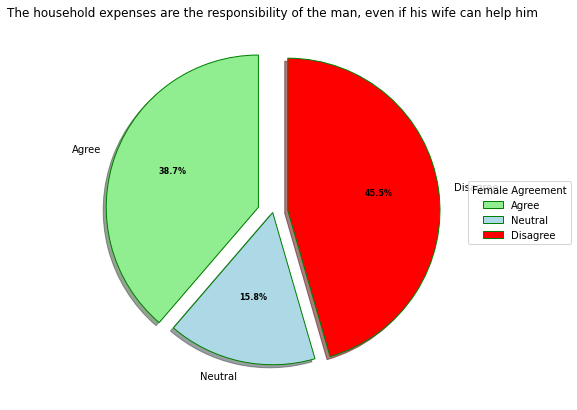

In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
  
  
# Creating dataset 
ag = ['Agree', 'Neutral', 'Disagree']
  
d =  [sum(Female_data['b4_agree']* Female_data['w'])/ sum(Female_data['w']),
     sum(Female_data['b4_neutral']* Female_data['w'])/ sum(Female_data['w']),
     sum(Female_data['b4_disagree']* Female_data['w'])/ sum(Female_data['w'])] 
  
  
# Creating explode data 
explode = (0.1, 0.0, 0.1) 
  
# Creating color parameters 
colors = ("lightgreen", "lightblue", "red")
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(d,  
                                  autopct = lambda pct: func(pct, d), 
                                  explode = explode,  
                                  labels = ag, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, ag, 
          title ="Female Agreement", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("The household expenses are the responsibility of the man, even if his wife can help him") 
  
# show plot 
plt.show() 

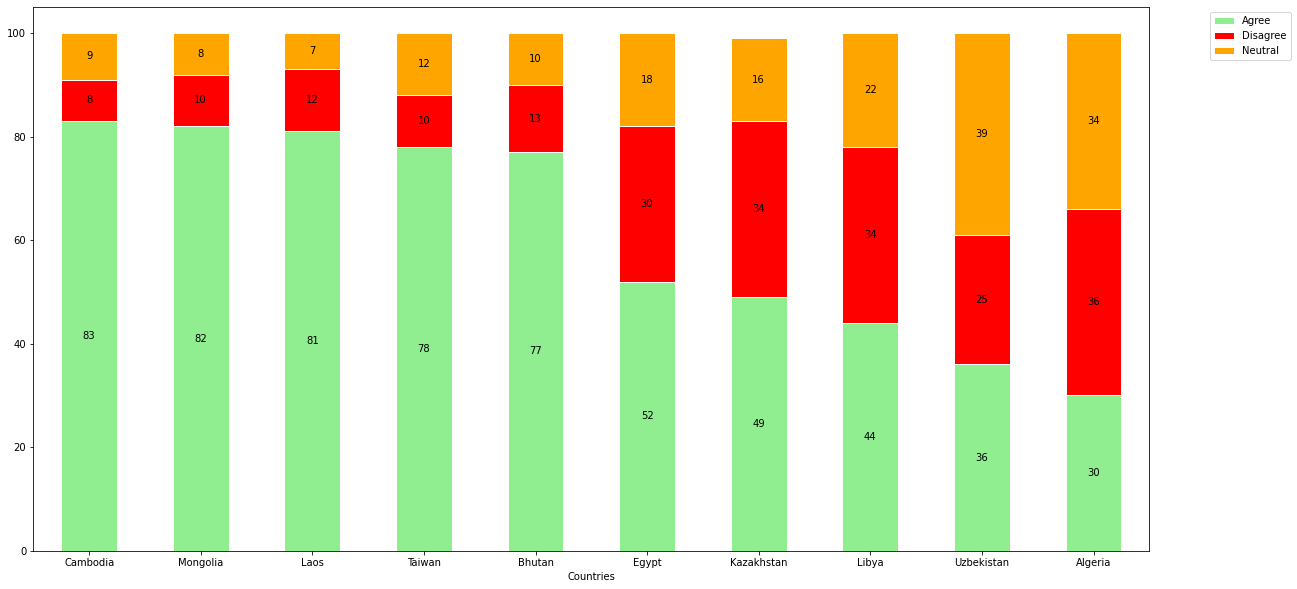

In [27]:
# 1.The household expenses are the responsibility of the man, even if his wife can help him 
q2_data = pd.concat([combined_data.sort_values(by='c3_agree', ascending=False).head(5), 
           combined_data.sort_values(by='c3_agree', ascending=False).tail(5)])
val1 = []
for a in q2_data[['c3_agree', 'c3_neutral', 'c3_disagree']].values:
    for i in a:
        val1.append(i)

df1= pd.DataFrame({'Range':['Agree','Neutral', 'Disagree']*10,
        'Value':val1})

df_value = df1.assign(idx=df1.groupby('Range').cumcount()).pivot(index='idx', columns='Range', values='Value')
# set colors
colors = ['lightgreen', 'red', 'orange']
# plot the price
ax = df_value.plot.bar(stacked=True, figsize=(20, 10), color=colors, ec='w')
# label the x-axis
plt.xticks(ticks=range(10), labels=q1_data.Country.values, rotation=0)
# x-axis title
plt.xlabel('Countries')
# position the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
col_idx = 0
row_idx = 0
# iterate through each bar patch from ax
for i, p in enumerate(ax.patches, 1):
    left, bottom, width, height = p.get_bbox().bounds
    v = df_value.iloc[row_idx, col_idx]
    if width > 0:
        ax.annotate(f'{v:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center')
    row_idx += 1
    if i%10 == 0:  
        col_idx += 1
        row_idx = 0
plt.savefig('/home/neil/LEAD_images/q3.png')

In [28]:
sum(combined_data['c3_agree']* combined_data['w'])/ sum(combined_data['w'])

64.7682234407754

In [29]:
sum(Male_data['c3_agree']* Male_data['w'])/ sum(Male_data['w'])

69.33923301228752

In [30]:
sum(Female_data['c3_agree']* Female_data['w'])/ sum(Female_data['w'])

59.444358529045836

In [31]:
sum(combined_data['c4_housewife_other']* combined_data['w'])/ sum(combined_data['w'])

6.916442961786676

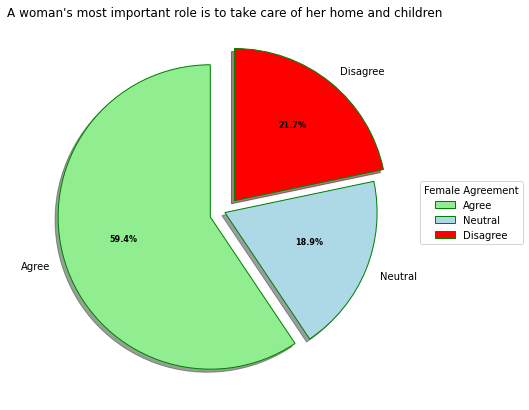

In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
  
  
# Creating dataset 
ag = ['Agree', 'Neutral', 'Disagree']
  
d =  [sum(Female_data['c3_agree']* Female_data['w'])/ sum(Female_data['w']),
     sum(Female_data['c3_neutral']* Female_data['w'])/ sum(Female_data['w']),
     sum(Female_data['c3_disagree']* Female_data['w'])/ sum(Female_data['w'])] 
  
  
# Creating explode data 
explode = (0.1, 0.0, 0.1) 
  
# Creating color parameters 
colors = ("lightgreen", "lightblue", "red")
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(d,  
                                  autopct = lambda pct: func(pct, d), 
                                  explode = explode,  
                                  labels = ag, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, ag, 
          title ="Female Agreement", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("A woman's most important role is to take care of her home and children") 
  
# show plot 
plt.show() 


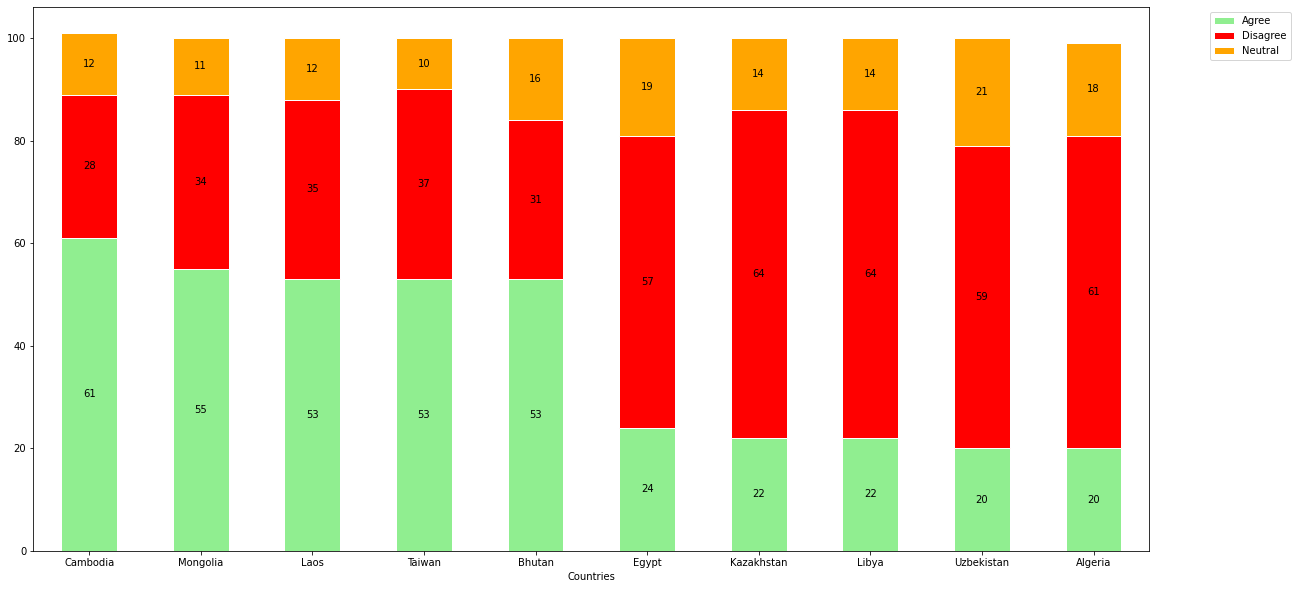

In [33]:
# 1.The household expenses are the responsibility of the man, even if his wife can help him 
q2_data = pd.concat([Female_data.sort_values(by='d5_agree', ascending=False).head(5), 
           Female_data.sort_values(by='d5_agree', ascending=False).tail(5)])
val1 = []
for a in q2_data[['d5_agree', 'd5_neutral', 'd5_disagree']].values:
    for i in a:
        val1.append(i)

df1= pd.DataFrame({'Range':['Agree','Neutral', 'Disagree']*10,
        'Value':val1})

df_value = df1.assign(idx=df1.groupby('Range').cumcount()).pivot(index='idx', columns='Range', values='Value')
# set colors
colors = ['lightgreen', 'red', 'orange']
# plot the price
ax = df_value.plot.bar(stacked=True, figsize=(20, 10), color=colors, ec='w')
# label the x-axis
plt.xticks(ticks=range(10), labels=q1_data.Country.values, rotation=0)
# x-axis title
plt.xlabel('Countries')
# position the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
col_idx = 0
row_idx = 0
# iterate through each bar patch from ax
for i, p in enumerate(ax.patches, 1):
    left, bottom, width, height = p.get_bbox().bounds
    v = df_value.iloc[row_idx, col_idx]
    if width > 0:
        ax.annotate(f'{v:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center')
    row_idx += 1
    if i%10 == 0:  
        col_idx += 1
        row_idx = 0
plt.savefig('/home/neil/LEAD_images/q5.png')

In [34]:
sum(combined_data['d5_agree']* combined_data['w'])/ sum(combined_data['w'])

30.747292879984805

In [35]:
sum(Male_data['d5_agree']* Male_data['w'])/ sum(Male_data['w'])

31.10165025646165

In [36]:
sum(Female_data['d5_agree']* Female_data['w'])/ sum(Female_data['w'])

30.053280254236423

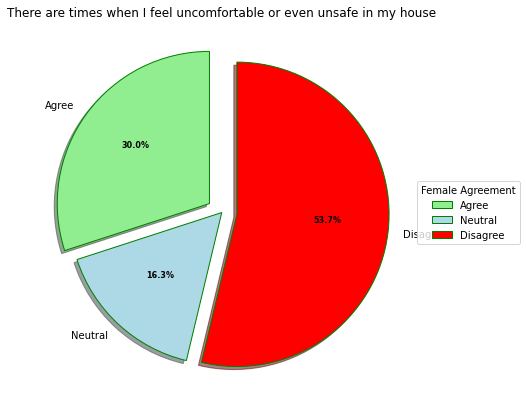

In [37]:
import numpy as np 
import matplotlib.pyplot as plt 
  
  
# Creating dataset 
ag = ['Agree', 'Neutral', 'Disagree']
  
d = [sum(Female_data['d5_agree']* Female_data['w'])/ sum(Female_data['w']),
     sum(Female_data['d5_neutral']* Female_data['w'])/ sum(Female_data['w']),
     sum(Female_data['d5_disagree']* Female_data['w'])/ sum(Female_data['w'])] 
  
  
# Creating explode data 
explode = (0.1, 0.0, 0.1) 
  
# Creating color parameters 
colors = ("lightgreen", "lightblue", "red")
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(d,  
                                  autopct = lambda pct: func(pct, d), 
                                  explode = explode,  
                                  labels = ag, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, ag, 
          title ="Female Agreement", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("There are times when I feel uncomfortable or even unsafe in my house") 
  
# show plot 
plt.show() 

In [38]:
good_picture = combined_data[['Country', 'a1_agree', 'b4_disagree', 'c3_disagree', 'd5_disagree']]

In [39]:
#TOPSIS
import math
good_picture['a1_agree'] = 0.25*good_picture['a1_agree']/math.sqrt(sum(i*i for i in good_picture['a1_agree'].values))
good_picture['b4_disagree'] = 0.25*good_picture['b4_disagree']/math.sqrt(sum(i*i for i in good_picture['b4_disagree'].values))
good_picture['c3_disagree'] = 0.25*good_picture['c3_disagree']/math.sqrt(sum(i*i for i in good_picture['c3_disagree'].values))
good_picture['d5_disagree'] = 0.25*good_picture['d5_disagree']/math.sqrt(sum(i*i for i in good_picture['d5_disagree'].values))
max_array = [good_picture['a1_agree'].max(), good_picture['b4_disagree'].max(), good_picture['c3_disagree'].max(), good_picture['d5_disagree'].max()]
min_array = [good_picture['a1_agree'].min(), good_picture['b4_disagree'].min(), good_picture['c3_disagree'].min(), good_picture['d5_disagree'].min()]

dist_from_max = []
for i, value in good_picture.iterrows():
    dis = math.sqrt((value['a1_agree']-max_array[0])**2 + (value['b4_disagree']-max_array[1])**2+ (value['c3_disagree']-max_array[2])**2+ (value['d5_disagree']-max_array[3])**2)
    dist_from_max.append(dis)
    
dist_from_min = []
for i, value in good_picture.iterrows():
    dis = math.sqrt((value['a1_agree']-min_array[0])**2 + (value['b4_disagree']-min_array[1])**2+ (value['c3_disagree']-min_array[2])**2+ (value['d5_disagree']-min_array[3])**2)
    dist_from_min.append(dis)
    
good_picture['dist_from_max'] = dist_from_max
good_picture['dist_from_min'] = dist_from_min
good_picture['performance'] = (good_picture['dist_from_max'] + good_picture['dist_from_min'])/good_picture['dist_from_min']


/home/neil/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/neil/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/neil/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [40]:
good_picture['rank'] = good_picture['performance'].rank()

/home/neil/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
perf = pd.concat([good_picture.sort_values(by='performance', ascending=True).head(5), 
          good_picture.sort_values(by='performance', ascending=True).tail(5)])

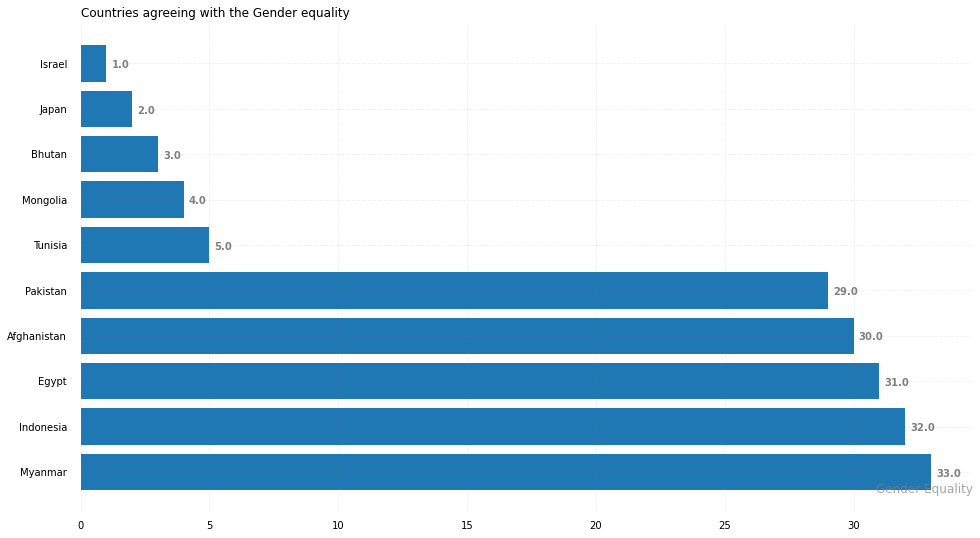

In [42]:
import pandas as pd 
from matplotlib import pyplot as plt 

name = perf['Country']
price = perf['rank']

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 

# Horizontal Bar Plot 
ax.barh(name, price) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
	ax.spines[s].set_visible(False) 

# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
		linestyle ='-.', linewidth = 0.5, 
		alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
	plt.text(i.get_width()+0.2, i.get_y()+0.5, 
			str(round((i.get_width()), 2)), 
			fontsize = 10, fontweight ='bold', 
			color ='grey') 

# Add Plot Title 
ax.set_title('Countries agreeing with the Gender equality', 
			loc ='left', ) 

# Add Text watermark 
fig.text(0.9, 0.15, 'Gender Equality', fontsize = 12, 
		color ='grey', ha ='right', va ='bottom', 
		alpha = 0.7) 

# Show Plot 
plt.show() 



In [43]:
sum(Female_data['a3_yes']* Female_data['w'])/ sum(Female_data['w'])

41.243974163386895

In [44]:
sum(Female_data['a5_r']* Female_data['w'])/ sum(Female_data['w'])

12.0449296376711

In [45]:
sum(Female_data['b2_self']* Female_data['w'])/ sum(Female_data['w'])

30.545369034905075

In [46]:
sum(Female_data['b3_fullyindependent']* Female_data['w'])/ sum(Female_data['w'])

40.11202410490867

In [47]:
c = sum(Female_data['d4_computer']* Female_data['w'])/ sum(Female_data['w'])
h = sum(Female_data['d4_home']* Female_data['w'])/ sum(Female_data['w'])
l = sum(Female_data['d4_land']* Female_data['w'])/ sum(Female_data['w'])
p = sum(Female_data['d4_phone']* Female_data['w'])/ sum(Female_data['w'])
v = sum(Female_data['d4_vehicle']* Female_data['w'])/ sum(Female_data['w'])
(c+h+l+p+v)/5

36.42286560361695

In [48]:
c, h, l, p, v

(31.899042153804295,
 32.13289551752735,
 13.547679665443715,
 72.86146786086874,
 31.67324282044065)

In [49]:
data['owning'] = (data['d4_computer'] +data['d4_home'] +data['d4_land'] +data['d4_phone']+data['d4_vehicle'])/5

/home/neil/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
sum(Female_data['b7_full']* Female_data['w'])/ sum(Female_data['w'])

26.7203274462739

In [51]:
sum(Female_data['b10_yes']* Female_data['w'])/ sum(Female_data['w'])

40.41122976807222

In [52]:
sum(Female_data['c1a_all']* Female_data['w'])/ sum(Female_data['w'])

41.958973473857704

In [53]:
sum(Female_data['c1_care']* Female_data['w'])/ sum(Female_data['w'])

58.13909244854564

In [54]:
sum(Female_data['b6_wage']* Female_data['w'])/ sum(Female_data['w'])

52.030201645401775

In [55]:
sum(Female_data['b3_dependent']* Female_data['w'])/ sum(Female_data['w'])

59.88797589509134

In [56]:
sum(Female_data['d1']* Female_data['w'])/ sum(Female_data['w'])

4.177269785507212

In [57]:
sum(Female_data['c2c_hours_chores']* Female_data['w'])/ sum(Female_data['w'])

5.261878312579139

In [58]:

sum(Female_data['b1_hours_work']* Female_data['w'])/ sum(Female_data['w'])

6.508648532192925

In [59]:
sum(Female_data['b8']* Female_data['w'])/ sum(Female_data['w'])

15.971275062543489

In [60]:
sum(Female_data['b9']* Female_data['w'])/ sum(Female_data['w'])

16.97864513421737

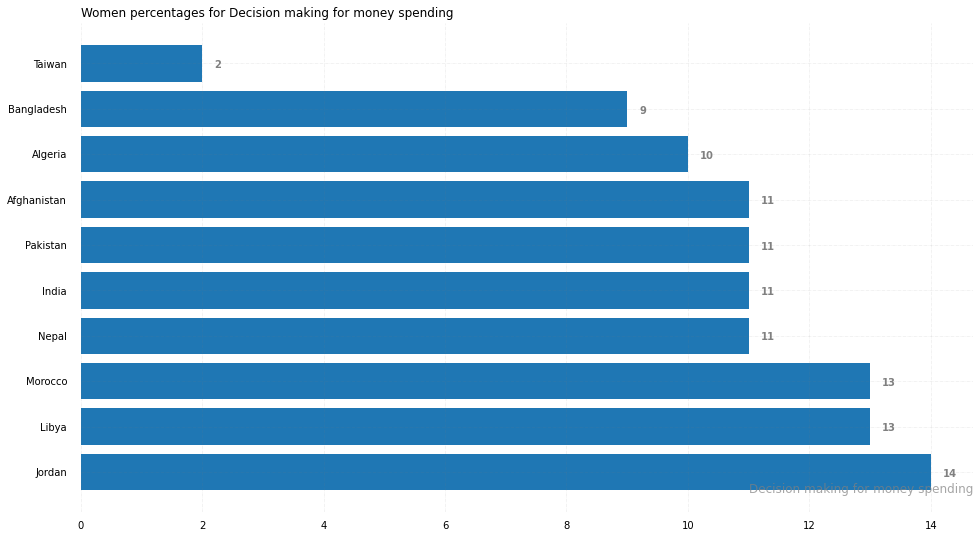

In [61]:
import pandas as pd 
from matplotlib import pyplot as plt 

name = Female_data['Country']
price = Female_data['b9']

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 

# Horizontal Bar Plot 
ax.barh(pd.DataFrame({'c':name, 'v':price}).sort_values(by='v', ascending=True)['c'].head(10)
        , pd.DataFrame({'c':name, 'v':price}).sort_values(by='v', ascending=True)['v'].head(10)) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
	ax.spines[s].set_visible(False) 

# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
		linestyle ='-.', linewidth = 0.5, 
		alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
	plt.text(i.get_width()+0.2, i.get_y()+0.5, 
			str(round((i.get_width()), 2)), 
			fontsize = 10, fontweight ='bold', 
			color ='grey') 

# Add Plot Title 
ax.set_title('Women percentages for Decision making for money spending', 
			loc ='left', ) 

# Add Text watermark 
fig.text(0.9, 0.15, 'Decision making for money spending', fontsize = 12, 
		color ='grey', ha ='right', va ='bottom', 
		alpha = 0.7) 

# Show Plot 
plt.show() 



In [62]:
gender_empowerment = data[data['Gender'] == 'Female'][['Country', 
                                                       'a3_yes', 'a5_r', 'b2_self', 'b3_fullyindependent', 'owning', 'b7_full', 'c1_care', 
                                                       'b10_yes', 'c1a_all', 'b6_wage', 'b3_dependent', 'd1']]

In [63]:
#TOPSIS
import math
gender_empowerment['a3_yes'] = 0.1428*gender_empowerment['a3_yes']/math.sqrt(sum(i*i for i in gender_empowerment['a3_yes'].values))
gender_empowerment['a5_r'] = 0.1428*gender_empowerment['a5_r']/math.sqrt(sum(i*i for i in gender_empowerment['a5_r'].values))
gender_empowerment['b2_self'] = 0.1428*gender_empowerment['b2_self']/math.sqrt(sum(i*i for i in gender_empowerment['b2_self'].values))
gender_empowerment['b3_fullyindependent'] = 0.1428*gender_empowerment['b3_fullyindependent']/math.sqrt(sum(i*i for i in gender_empowerment['b3_fullyindependent'].values))
gender_empowerment['owning'] = 0.1428*gender_empowerment['owning']/math.sqrt(sum(i*i for i in gender_empowerment['owning'].values))
gender_empowerment['b7_full'] = 0.1428*gender_empowerment['b7_full']/math.sqrt(sum(i*i for i in gender_empowerment['b7_full'].values))
gender_empowerment['c1_care'] = 0.1428*gender_empowerment['c1_care']/math.sqrt(sum(i*i for i in gender_empowerment['c1_care'].values))

ideal_case = [gender_empowerment['a3_yes'].max(), 
             gender_empowerment['a5_r'].max(), 
             gender_empowerment['b2_self'].max(), 
             gender_empowerment['b3_fullyindependent'].max(),
             gender_empowerment['owning'].max(),
             gender_empowerment['b7_full'].max(),
             gender_empowerment['c1_care'].max(),
             gender_empowerment['b10_yes'].min(),
             gender_empowerment['c1a_all'].min(),
              gender_empowerment['b6_wage'].min(),
              gender_empowerment['b3_dependent'].min(),
              gender_empowerment['d1'].min()
            ]
worst_case = [gender_empowerment['a3_yes'].min(), 
             gender_empowerment['a5_r'].min(), 
             gender_empowerment['b2_self'].min(), 
             gender_empowerment['b3_fullyindependent'].min(),
            gender_empowerment['owning'].min(),
            gender_empowerment['b7_full'].min(),
            gender_empowerment['c1_care'].min(),
              gender_empowerment['b10_yes'].max(),
             gender_empowerment['c1a_all'].max(),
              gender_empowerment['b6_wage'].max(),
              gender_empowerment['b3_dependent'].max(),
              gender_empowerment['d1'].max()
             ]

dist_from_ideal = []
for i, value in gender_empowerment.iterrows():
    dis = math.sqrt(
        (value['a3_yes']-ideal_case[0])**2 + 
                    (value['a5_r']-ideal_case[1])**2+ 
                    (value['b2_self']-ideal_case[2])**2+ 
                    (value['b3_fullyindependent']-ideal_case[3])**2+
                   (value['owning']-ideal_case[4])**2+
                    (value['b7_full']-ideal_case[5])**2+
                    (value['c1_care']-ideal_case[6])**2+
                    
                   (value['b10_yes']-ideal_case[7])**2+
                   (value['c1a_all']-ideal_case[8])**2+
                   (value['b6_wage']-ideal_case[9])**2+
                   (value['b3_dependent']-ideal_case[10])**2+
                   (value['d1']-ideal_case[11])**2
    )
    dist_from_ideal.append(dis)
    
dist_from_worst = []
for i, value in gender_empowerment.iterrows():
    dis = math.sqrt(
        (value['a3_yes']-worst_case[0])**2 + 
        (value['a5_r']-worst_case[1])**2 + 
                    (value['b2_self']-worst_case[2])**2 + 
                    (value['b3_fullyindependent']-worst_case[3])**2 +
                    (value['owning']-worst_case[4])**2 +
                    (value['b7_full']-worst_case[5])**2 +
                    (value['c1_care']-worst_case[6])**2 +
                   
                    (value['b10_yes']-worst_case[7])**2 +
                   (value['c1a_all']-worst_case[8])**2 +
                   (value['b6_wage']-worst_case[9])**2 +
                   (value['b3_dependent']-worst_case[10])**2 +
                   (value['d1']-worst_case[11])**2
    )
    dist_from_worst.append(dis)
    
gender_empowerment['dist_from_ideal'] = dist_from_ideal
gender_empowerment['dist_from_worst'] = dist_from_worst
gender_empowerment['performance'] = (gender_empowerment['dist_from_ideal'] + gender_empowerment['dist_from_worst'])/gender_empowerment['dist_from_worst']


In [64]:
gender_empowerment['rank'] = gender_empowerment['performance'].rank()

In [65]:
perf1 = pd.concat([gender_empowerment.sort_values(by='performance', ascending=True).head(5), 
          gender_empowerment.sort_values(by='performance', ascending=True).tail(5)])

In [66]:
perf1

,Country,a3_yes,a5_r,b2_self,b3_fullyindependent,owning,b7_full,c1_care,b10_yes,c1a_all,b6_wage,b3_dependent,d1,dist_from_ideal,dist_from_worst,performance,rank
15,Japan,0.034646,0.042488,0.031455,0.028159,0.032140,0.033063,0.020432,21,29,46,46,15,34.132112,76.367557,1.446945,1.0
162,Qatar,0.026651,0.028831,0.035949,0.031288,0.028106,0.023805,0.026817,46,37,24,40,6,35.426011,70.668257,1.501300,2.0
138,Israel,0.027184,0.060697,0.034665,0.029202,0.032531,0.055546,0.018729,32,33,47,44,14,36.986489,67.401833,1.548746,3.0
33,Taiwan,0.026118,0.027314,0.037875,0.032331,0.032531,0.029095,0.022560,26,44,52,38,7,42.035724,71.902733,1.584619,4.0
144,Kuwait,0.025585,0.030349,0.037875,0.037024,0.025894,0.020499,0.026391,58,45,36,29,4,49.213844,65.199715,1.754817,5.0
153,Morocco,0.014392,0.007587,0.008987,0.013037,0.016656,0.009258,0.021709,50,33,51,75,3,63.356195,42.883564,2.477400,30.0
141,Jordan,0.013859,0.010622,0.008987,0.013037,0.022381,0.013225,0.023412,53,30,51,75,2,63.992238,42.755119,2.496715,31.0
147,Lebanon,0.019189,0.016692,0.020542,0.019816,0.029928,0.023144,0.022135,62,29,58,62,3,64.233979,39.610618,2.621635,32.0
126,Algeria,0.014392,0.006070,0.009629,0.013037,0.019909,0.011241,0.021283,48,41,54,75,1,66.490655,40.620193,2.636887,33.0
30,Philippines,0.025585,0.013657,0.020542,0.021380,0.020299,0.011241,0.025540,81,52,65,59,2,86.896520,24.899813,4.489846,34.0


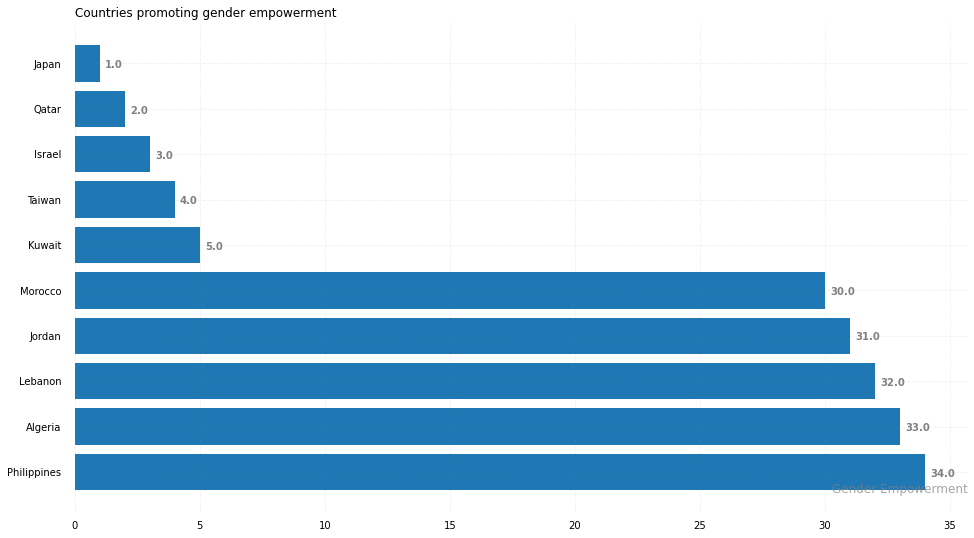

In [67]:
import pandas as pd 
from matplotlib import pyplot as plt 

name = perf1['Country']
price = perf1['rank']

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 

# Horizontal Bar Plot 
ax.barh(name, price) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
	ax.spines[s].set_visible(False) 

# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
		linestyle ='-.', linewidth = 0.5, 
		alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
	plt.text(i.get_width()+0.2, i.get_y()+0.5, 
			str(round((i.get_width()), 2)), 
			fontsize = 10, fontweight ='bold', 
			color ='grey') 

# Add Plot Title 
ax.set_title('Countries promoting gender empowerment', 
			loc ='left', ) 

# Add Text watermark 
fig.text(0.9, 0.15, 'Gender Empowerment', fontsize = 12, 
		color ='grey', ha ='right', va ='bottom', 
		alpha = 0.7) 

# Show Plot 
plt.show() 



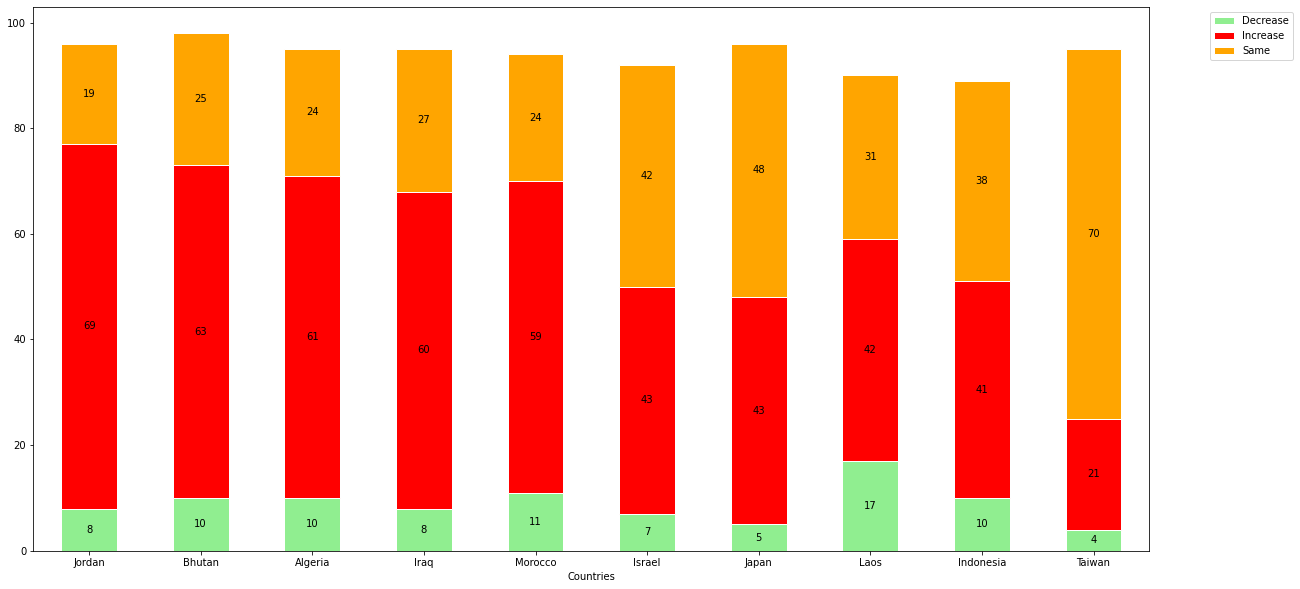

In [68]:
q1_data = pd.concat([combined_data.sort_values(by='c1d_increase', ascending=False).head(5), 
           combined_data.sort_values(by='c1d_increase', ascending=False).tail(5)])
val = []
for a in q1_data[['c1d_increase', 'c1d_same', 'c1d_decrease']].values:
    for i in a:
        val.append(i)

df1= pd.DataFrame({'Range':['Increase','Same', 'Decrease']*10,
        'Value':val})

df_value = df1.assign(idx=df1.groupby('Range').cumcount()).pivot(index='idx', columns='Range', values='Value')
# set colors
colors = ['lightgreen', 'red', 'orange']
# plot the price
ax = df_value.plot.bar(stacked=True, figsize=(20, 10), color=colors, ec='w')
# label the x-axis
plt.xticks(ticks=range(10), labels=q1_data.Country.values, rotation=0)
# x-axis title
plt.xlabel('Countries')
# position the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
col_idx = 0
row_idx = 0
# iterate through each bar patch from ax
for i, p in enumerate(ax.patches, 1):
    left, bottom, width, height = p.get_bbox().bounds
    v = df_value.iloc[row_idx, col_idx]
    if width > 0:
        ax.annotate(f'{v:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center')
    row_idx += 1
    if i%10 == 0:  
        col_idx += 1
        row_idx = 0
plt.savefig('/home/neil/LEAD_images/covid1.png')

In [69]:
no_medical_care = sum(combined_data['d6_health']* combined_data['w'])/ sum(combined_data['w'])

In [70]:
isolation = sum(combined_data['d6_isolate']* combined_data['w'])/ sum(combined_data['w'])

In [71]:
lost_job = sum(combined_data['d6_job']* combined_data['w'])/ sum(combined_data['w'])

In [72]:
no_medical_supply_access = sum(combined_data['d6_medical']* combined_data['w'])/ sum(combined_data['w'])

In [73]:
migration_issues = sum(combined_data['d6_migrate']* combined_data['w'])/ sum(combined_data['w'])

In [74]:
no_personal_care = sum(combined_data['d6_personal']* combined_data['w'])/ sum(combined_data['w'])

In [75]:
school_cancelled = sum(combined_data['d6_school']* combined_data['w'])/ sum(combined_data['w'])

In [76]:
no_transport_access = sum(combined_data['d6_transport']* combined_data['w'])/ sum(combined_data['w'])

In [77]:
import pandas as pd 
from matplotlib import pyplot as plt 

name = ['no_medical_care', 'isolation', 'lost_job', 'no_medical_supply_access', 'migration_issues',
        'no_personal_care', 'school_cancelled', 'no_transport_access']
price = [no_medical_care, isolation, lost_job, no_medical_supply_access, migration_issues, no_personal_care, 
        school_cancelled, no_transport_access]
f =  pd.DataFrame({'issue': name, 
                 'val': price}).sort_values(by='val', ascending=False)


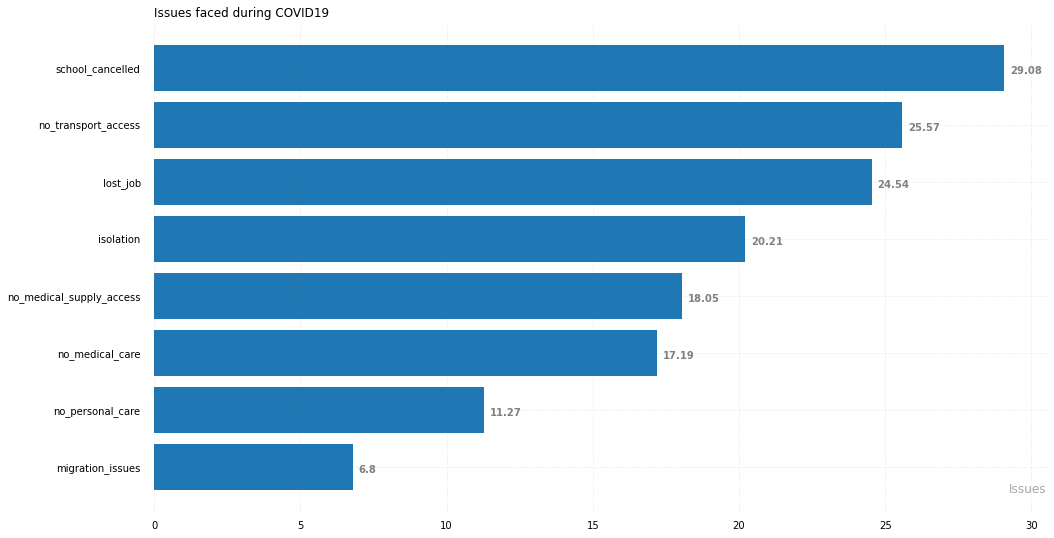

In [78]:
name = f['issue'].values
price = f['val'].values
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 

# Horizontal Bar Plot 
ax.barh(name, price) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
	ax.spines[s].set_visible(False) 

# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
		linestyle ='-.', linewidth = 0.5, 
		alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
	plt.text(i.get_width()+0.2, i.get_y()+0.5, 
			str(round((i.get_width()), 2)), 
			fontsize = 10, fontweight ='bold', 
			color ='grey') 

# Add Plot Title 
ax.set_title('Issues faced during COVID19', 
			loc ='left', ) 

# Add Text watermark 
fig.text(0.9, 0.15, 'Issues', fontsize = 12, 
		color ='grey', ha ='right', va ='bottom', 
		alpha = 0.7) 

# Show Plot 
plt.show() 



In [79]:
staying_home_bored = sum(combined_data['d7_bored']* combined_data['w'])/ sum(combined_data['w'])
limited_food = sum(combined_data['d7_food']* combined_data['w'])/ sum(combined_data['w'])
access_to_health = sum(combined_data['d7_health']* combined_data['w'])/ sum(combined_data['w'])
no_info_about_covid = sum(combined_data['d7_info']* combined_data['w'])/ sum(combined_data['w'])
loan_issue = sum(combined_data['d7_loan']* combined_data['w'])/ sum(combined_data['w'])
money_issue = sum(combined_data['d7_money']* combined_data['w'])/ sum(combined_data['w'])
stuck = sum(combined_data['d7_stuck']* combined_data['w'])/ sum(combined_data['w'])
future_work = sum(combined_data['d7_work']* combined_data['w'])/ sum(combined_data['w'])

name = ['staying_home_bored', 'limited_food', 'access_to_health', 'no_info_about_covid', 'loan_issue',
        'money_issue', 'stuck', 'future_work']
price = [staying_home_bored, limited_food, access_to_health, no_info_about_covid, loan_issue, money_issue, 
        stuck, future_work]
f =  pd.DataFrame({'issue': name, 
                 'val': price}).sort_values(by='val', ascending=False)








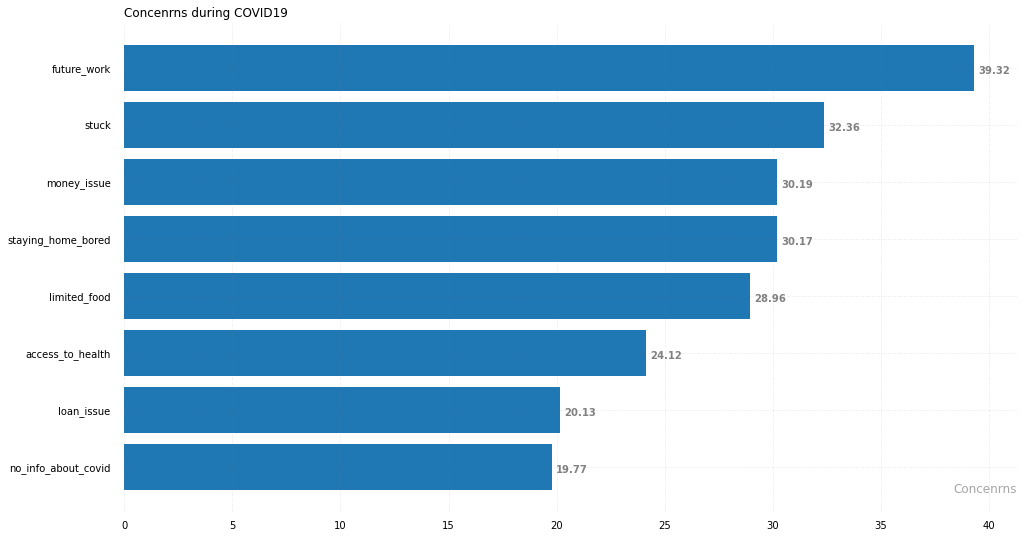

In [80]:
name = f['issue'].values
price = f['val'].values
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 

# Horizontal Bar Plot 
ax.barh(name, price) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
	ax.spines[s].set_visible(False) 

# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
		linestyle ='-.', linewidth = 0.5, 
		alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
	plt.text(i.get_width()+0.2, i.get_y()+0.5, 
			str(round((i.get_width()), 2)), 
			fontsize = 10, fontweight ='bold', 
			color ='grey') 

# Add Plot Title 
ax.set_title('Concenrns during COVID19', 
			loc ='left', ) 

# Add Text watermark 
fig.text(0.9, 0.15, 'Concenrns', fontsize = 12, 
		color ='grey', ha ='right', va ='bottom', 
		alpha = 0.7) 

# Show Plot 
plt.show() 



In [81]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
import pandas as pd

In [82]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = gender_empowerment['Country'],
        locationmode = "country names",
        z = gender_empowerment['rank'],
        text = gender_empowerment['Country'],
        colorbar = {'title' : 'Low rank represents empowerment'},
      )

In [83]:
layout = dict(geo = dict(projection = {'type':'natural earth'}))

In [84]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)